In [ ]:
import pandas as pd
import sqlite3
import numpy as np

## Importing and Preparing the Data

In [ ]:
'''
Read database content for tweet data
'''

connection = sqlite3.connect('tweet_db_gamestonk_final2.db')
cursor = connection.cursor()

query = '''SELECT Tweet.tweetid, Tweet.createddate, User.screenname, User.verified, Tweet.tweet, Tweet.cleantweet, Tweet.retweeted, Tweet.favorited
FROM Tweet INNER JOIN User
ON Tweet.userid = User.userid;'''

cursor.execute(query)
query_output = cursor.fetchall()

cursor.close()
connection.close()

In [ ]:
'''
Convert the query output above into dataframe
'''
tweetDF = pd.DataFrame(query_output,
                       columns=['tweetid', 'createddate', 'screenname', 'verified', 'tweet',
                                'cleantweet', 'retweeted','favorited'])

In [ ]:
'''
Convert value data type of date column to datetime
'''
tweetDF['createddate'] = pd.to_datetime(tweetDF['createddate'], format='%d-%m-%Y')

## Classify the Sentiment of Each Tweet
The tool used to perform this task is TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
'''
Create functions to get subjectivity, polarity, and
the sentiment
'''

def getSubjectivity(string):
    return TextBlob(string).sentiment.subjectivity

def getPolarity(string):
    return TextBlob(string).sentiment.polarity

def getSentiment(value):
    if value < 0:
        return 'negative'
    elif value == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
'''
Generate values and
create new columns for each of them
'''

tweetDF['subjectivity'] = tweetDF['cleantweet'].apply(getSubjectivity)

In [ ]:
tweetDF['polarity'] = tweetDF['cleantweet'].apply(getPolarity)

In [ ]:
tweetDF['sentiment'] = tweetDF['polarity'].apply(getSentiment)

In [ ]:
tweetDF

,tweetid,createddate,screenname,verified,tweet,cleantweet,retweeted,favorited,subjectivity,polarity,sentiment
0,1354177670364459008,2021-01-26,LA1986,0,GAMESTONK #GameStonk #GameStop #GME,gamestonk,0,1,0.00,0.00,neutral
1,1354179313634070528,2021-01-26,NaveNage,0,#GameStonk #GME 🤑 https://t.co/xmpiXN4jvc,,0,1,0.00,0.00,neutral
2,1354180173147594753,2021-01-26,GuillaumeKMG,0,#wallstreetbets sub has grown 40% since Januar...,sub has grown since january st up over new mem...,0,0,0.43,0.13,positive
3,1354185684244963328,2021-01-26,Xcllusivefire,0,"⁦@elonmusk⁩ GameStonk tshirt, Stonk investing ...",gamestonk shirt stone investing shirt,0,1,0.00,0.00,neutral
4,1354189015868649475,2021-01-26,ReallyRealNOW,0,@elonmusk Give me that #gamestonk shirt! #gme ...,give me that shirt,0,0,0.00,0.00,neutral
...,...,...,...,...,...,...,...,...,...,...,...
3002,1356386944947687424,2021-02-01,SheepofWSB,0,The Volkswagen squeeze had a major dip before ...,the volkswagen squeeze had a major dip before ...,0,0,0.45,-0.17,negative
3003,1356386964681883648,2021-02-01,stirlospace,0,#Training #TRAIN #wreck #gamedev #GameStop #ga...,game please drive careful engineers,0,0,0.70,-0.25,negative
3004,1356389069740273664,2021-02-01,realStevoDaniel,0,Meme stocks right now 🌝 .... #gamestonk #memes...,meme stocks right now,0,4,0.54,0.29,positive
3005,1356390619921440771,2021-02-01,PeaceKeeper500,0,To all my paper handers out there $AMC $GME #h...,to all my paper sanders out there amc game,0,0,0.40,-0.40,negative


In [ ]:
'''
Store sentiment analysis result into the database
'''

connection = sqlite3.connect('tweet_db_gamestonk_final2.db')
cursor = connection.cursor()

for i in range(len(tweetDF['sentiment'])):
    query = INSERT INTO Sentiment(tweetid, sentiment) VALUES (?,?);'
    cursor.execute(query, (int(tweetDF['tweetid'][i]), tweetDF['sentiment'][i]))

connection.commit()

cursor.close()
connection.close()

## Distribution of Each Sentiment Label

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

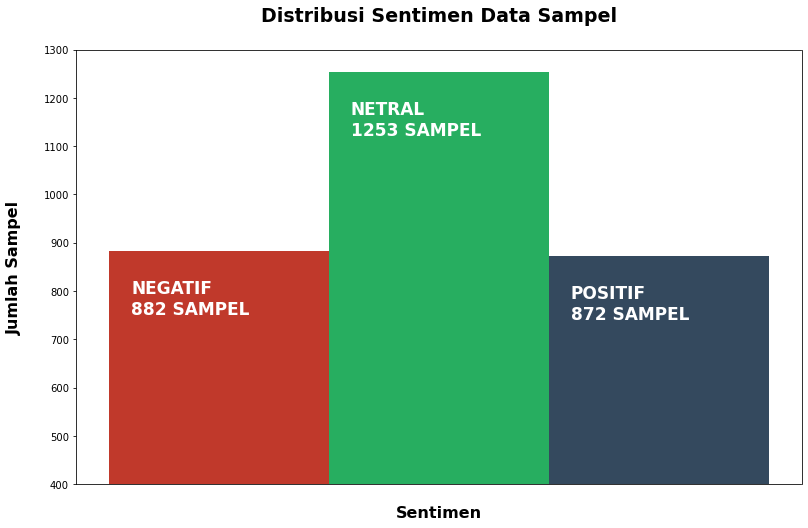

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))

y_neg = tweetDF['sentiment'].value_counts()['negative']
y_neu = tweetDF['sentiment'].value_counts()['neutral']
y_pos = tweetDF['sentiment'].value_counts()['positive']


ax.bar(1, y_neg, color='#c0392b', width=1)
ax.bar(2, y_neu, color='#27ae60', width=1)
ax.bar(3, y_pos, color='#34495e', width=1)

adj = 0.4
ax.text(1-adj, y_neg-130, f'NEGATIF\n{str(y_neg)} SAMPEL', color='white', fontsize=17, fontweight='bold')
ax.text(2-adj, y_neu-130, f'NETRAL\n{str(y_neu)} SAMPEL', color='white', fontsize=17, fontweight='bold')
ax.text(3-adj, y_pos-130, f'POSITIF\n{str(y_pos)} SAMPEL', color='white', fontsize=17, fontweight='bold')

plt.title('Distribusi Sentimen Data Sampel\n', fontsize=19, fontweight='bold')
plt.xlabel('\nSentimen', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Sampel\n', fontsize=16, fontweight='bold')

plt.ylim(400,1300)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.savefig('01_sentiment_dist.png', dpi=200)
plt.show()

## Distribution of Sample Data Based on Their Polarity & Subjectivity

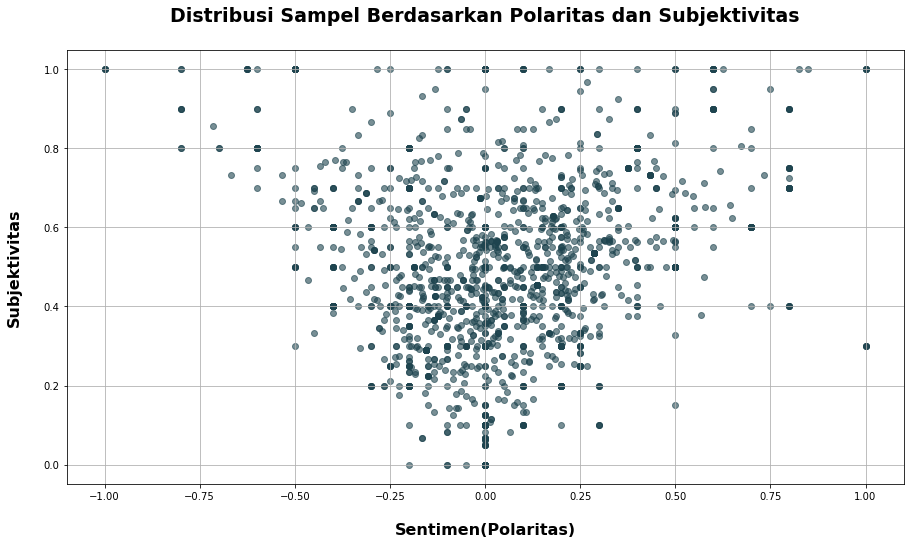

In [ ]:
fig_1b, ax_1b = plt.subplots(figsize=(15,8))

dataplot = ax_1b.scatter(tweetDF['polarity'], tweetDF['subjectivity'], alpha=0.6, c='#1E444F')

plt.title('Distribusi Sampel Berdasarkan Polaritas dan Subjektivitas\n', fontsize=19, fontweight='bold')
plt.xlabel('\nSentimen(Polaritas)', fontsize=16, fontweight='bold')
plt.ylabel('Subjektivitas\n', fontsize=16, fontweight='bold')

plt.grid()

plt.savefig('03_dist_subj_pol.png', dpi=200)

plt.show()

## Tweet Count Each Day
Date Range: 26 Jan 2021 - 1 Feb 2021

In [ ]:
'''
Group the data by the date it posted and apply
count aggregate function on it
'''

tweetCount_gb_Date = tweetDF.groupby(by='createddate')['tweetid'].count()

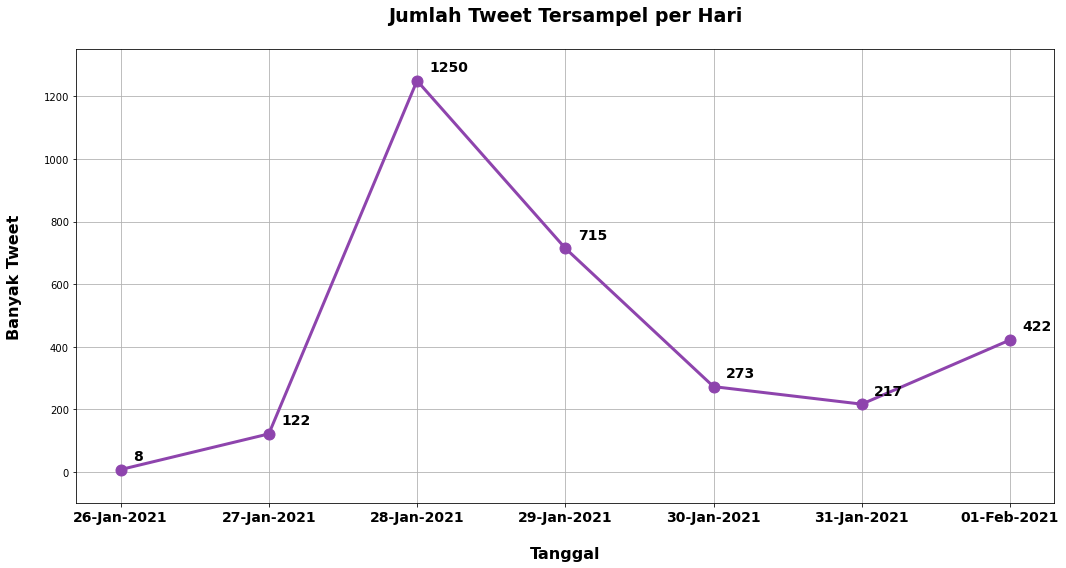

In [ ]:
from datetime import timedelta
import matplotlib.dates as mdates

#-------------------------------------------------------------------------------------

'''
Setting up variables
'''
fig2, ax2 = plt.subplots(figsize=(15,8))

X = tweetDF_gb_Date.index
y = tweetCount_gb_Date
#-------------------------------------------------------------------------------------
'''
Plot the data
'''

plt.plot(X, y, marker='o', markersize=11, linewidth=3, color='#8e44ad')
plt.grid()

adj = timedelta(hours=2)
for i, value in enumerate(y):
    plt.text(X[i]+adj, value+30, value, fontsize=14, fontweight='bold')
    
#-------------------------------------------------------------------------------------
'''
Add additional graph setting
then save and show the graph
'''

plt.title('Jumlah Tweet Tersampel per Hari\n', fontsize=19, fontweight='bold')
plt.xlabel('\nTanggal', fontsize=16, fontweight='bold')
plt.ylabel('Banyak Tweet\n', fontsize=16, fontweight='bold')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.xticks(fontsize=14, fontweight='bold')

plt.ylim(-100,1350)
plt.tight_layout()

plt.savefig('02_Jumlah_tweet_perHari.png', dpi=200)

plt.show()

---

## Wordcloud and Corpus Matrix for Every Sentiment Label

### Additional text cleaning (Special for corpus matrix & generating wordcloud)

In [ ]:
'''
To get the context of each sentiment (the target of such sentiment)
Some data which were cleaned in our stored 'cleantweet' are needed,
such as mentions and hashtags.

Thus, we need to perform another cleaning, but still preserving
said information.
'''

import string
import re
from nltk.corpus import stopwords

en_sw = stopwords.words('english')

'''
Additional Stop Words:

>gamestonk & gme:
   Need to be removed because they're the search keyword,
   so it's confirmed that they're exist on all sample data.
   
>The rest:
   Need to be removed as they are cuss word with huge frequency.
   Hence, they will be appeared in wordcloud if not removed
'''
additional_sw = ['gamestonk', 'gme', 'fuck', 'fucking']
en_sw.extend(additional_sw)


def simpleClean(stringTxt):
        
    stringTxt = re.sub(r'http\S+', '', stringTxt) #remove links
    stringTxt = stringTxt.replace('\n', ' ') #remove newline escape sequence
    stringTxt = stringTxt.lower() #convert all char to lowercase
    stringTxt = re.sub(r'\d+', '', stringTxt) #remove numbers
    
    #remove emoji/emoticons and kaomoji
    printable = set(string.printable)
    stringTxt = ''.join(filter(lambda x: x in printable, stringTxt))

    #remove special characters
    stringTxt = stringTxt.translate(str.maketrans('','',string.punctuation))

    #remove whitespaces
    stringTxt = stringTxt.strip()
    
    #remove en stopwords
    stringTxt = ' '.join([word for word in stringTxt.split() if word not in en_sw])
    
    #remove extra space after numbers & special chars gone
    stringTxt = re.sub(r' +',' ', stringTxt)
    
    return stringTxt

### Generate wordcloud

In [ ]:
from wordcloud import WordCloud
from PIL import Image

#set a picture as the wordcloud mask
mask = np.array(Image.open('mask.png'))

#create a string object which contains all the word in the data
wholeWord_clean = ' '.join(tweetDF['tweet'].apply(simpleClean).tolist())

In [ ]:
'''
Create wordcloud object then use it to generate the picture
based on the wholeWord_clean data
'''

wordcloud = WordCloud(font_path='arial', mask=mask, background_color='#18191a',
                          max_font_size=400, max_words=100, colormap='Oranges_r',
                          relative_scaling=0.7)

wordcloud.generate(wholeWord_clean)

<function matplotlib.pyplot.show(close=None, block=None)>

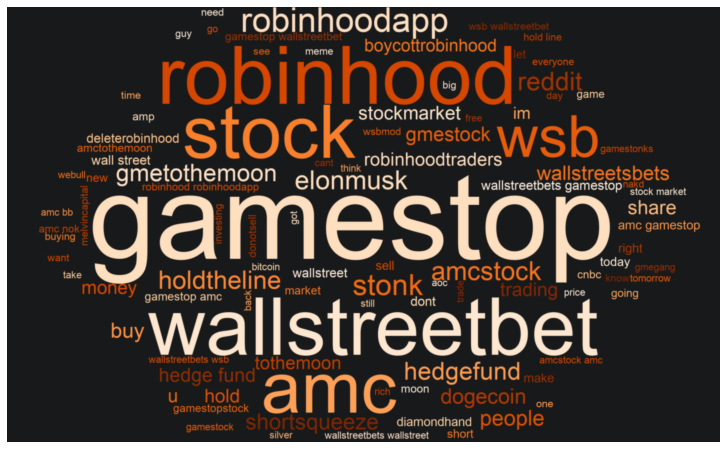

In [ ]:
'''
Generate the wordcloud picture and save
'''

fig_cl, ax_cl = plt.subplots(figsize=(15,8))

plt.imshow(wordcloud, interpolation='gaussian')
plt.axis('off')
plt.margins(x=0,y=0)
plt.savefig('wordcloud.png', dpi=200)

plt.show

---

## Corpus Matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

In [ ]:
'''
Create corpus matrix the whole data
and show top 10 most frequent words
'''

everything = tweetDF['tweet'].apply(simpleClean).tolist()


X_e = vec.fit_transform(everything)

df_e = pd.DataFrame(X_e.toarray(), columns=vec.get_feature_names())

sumList = []
for col in df_e.columns:
    sumList.append(df_e[col].sum())
    
corpus_e = np.transpose(df_e)

corpus_e['SUM'] = sumList

corpus_e = corpus_e.sort_values(by='SUM', ascending=False)

corpus_e[0:10]

,0,1,2,3,4,5,6,7,8,9,...,2998,2999,3000,3001,3002,3003,3004,3005,3006,SUM
gamestop,1,0,1,0,0,1,0,1,1,1,...,0,0,0,1,0,1,0,0,2,1582
amc,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,2,0,910
wallstreetbets,0,0,1,0,0,0,0,0,1,1,...,1,1,0,0,1,0,0,0,0,869
robinhood,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,609
wsb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,427
robinhoodapp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,409
gmetothemoon,0,0,0,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,318
amcstock,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,308
reddit,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,307
hold,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,296


In [ ]:
#simplified table

simple_top10_corpus = corpus_e['SUM'].reset_index().rename({'index':'Kata','SUM':'Frekuensi'}, axis=1)[0:10]

display(simple_top10_corpus.set_index('Kata'))

,Frekuensi
Kata,
gamestop,1582
amc,910
wallstreetbets,869
robinhood,609
wsb,427
robinhoodapp,409
gmetothemoon,318
amcstock,308
reddit,307


---

## Find the Most Favorite Tweet

Favorite count of the twitter post samples will reflect the sentiment better than retweets,
<br>because you can retweet a post but add a negative-tone comment on it.

In [ ]:
sortby_fav = tweetDF.sort_values(by='favorited', ascending=False)
top10_fav = sortby_fav.head(10)

print('\n===========================================\n')
print(f"Sentiment in Top 10 Favorite:\n\n{top10_fav['sentiment'].value_counts()}")
print('\n===========================================\n')

display(top10_fav)



Sentiment in Top 10 Favorite:

positive    5
neutral     4
negative    1
Name: sentiment, dtype: int64




,tweetid,createddate,screenname,verified,tweet,cleantweet,retweeted,favorited,subjectivity,polarity,sentiment
2741,1356236100210057216,2021-02-01,tiscomics,0,Gamestop\n\n#gamestop #wallstreetbets #gamesto...,gamespot,90,895,0.00,0.00,neutral
872,1354861572850479105,2021-01-28,sweeney_tv,0,"""stock manipulation is only legal when we do i...",stock manipulation is only legal when we do it...,123,791,0.60,0.10,positive
2406,1355733570757808130,2021-01-31,amysundae,0,I created some art that reflects our times. \...,i created some art that reflects our times oil...,41,540,0.00,0.00,neutral
1644,1355036922557722624,2021-01-29,bluekeelfp,0,Hedge funds right now #GME #gamestonk #amcstoc...,hedge funds right now,54,250,0.54,0.29,positive
370,1354748236364468226,2021-01-28,dagaharshit,0,#AppleStore top apps. This is what happens whe...,top apps this is what happens when amp goes,17,228,0.50,0.50,positive
379,1354752375630700546,2021-01-28,Thesmallest1,0,Within 8 minutes #GME jumped so fast 😬😬😬 #ston...,within minutes jumped so fast friday cant wait...,16,204,0.60,0.20,positive
2571,1356011243245600773,2021-01-31,GameStonk_,0,GameStop United the country at a time when not...,gamespot united the country at a time when not...,20,164,0.00,0.00,neutral
155,1354594740088541187,2021-01-28,gdeltz,0,Showed support to the men on the ground today ...,showed support to the men on the ground today ...,15,157,0.00,0.00,neutral
686,1354831870383583232,2021-01-28,renaissance_atm,0,Market Manipulation continues to be the top st...,market manipulation continues to be the top st...,51,145,0.57,0.43,positive
1798,1355159166063497216,2021-01-29,Geopol2030,0,America has 800 military bases around the worl...,america has military bases around the world we...,71,144,0.38,-0.40,negative


### Create Visualization for Top 10 Most Favorite Tweet Samples

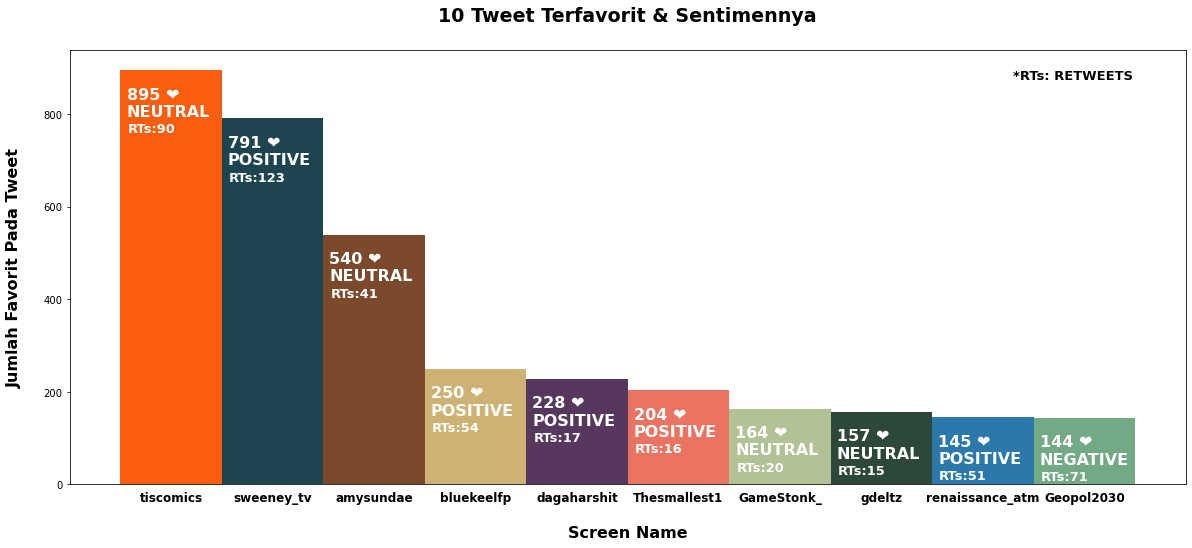

In [ ]:
fig_fav, ax_fav = plt.subplots(figsize=(20,8))

#-------------------------------------------------------------------------------------
'''
Customize color cycle
'''

colorList = ['#FB5D0E','#1E444F','#7B492C','#CDB273','#56375D','#EA7461',
             '#B1C294','#2D4738','#2B79AA','#73AA86','#7A7E6B']

matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=colorList)
#-------------------------------------------------------------------------------------
'''
Setting up variables
'''

X = np.arange(1,11,1)
screenNames = top10_fav.reset_index()['screenname']

y_sentiment = top10_fav.reset_index()['sentiment']
y_fav = top10_fav.reset_index()['favorited']
y_rt = top10_fav.reset_index()['retweeted']

#-------------------------------------------------------------------------------------
'''
Plot the data
'''

for i in range(len(top10_fav['tweetid'])):
    ax_fav.bar(i+1, y_fav[i], width=1)
    
    ax_fav.text(i+0.56, y_fav[i]-100, f'{str(y_fav[i])} ❤️\n{y_sentiment[i].upper()}',
                fontsize=16, color='white', fontweight='bold')
    
    ax_fav.text(i+0.57, y_fav[i]-135, 'RTs:'+str(y_rt[i]),
                fontsize=13, color='white', fontweight='bold')
    
#-------------------------------------------------------------------------------------
'''
Add additional graph setting
then save and show the graph
'''

ax_fav.text(9.3, 875, '*RTs: RETWEETS', fontsize=13, fontweight='bold')

plt.title('10 Tweet Terfavorit & Sentimennya\n', fontsize=19, fontweight='bold')
plt.xlabel('\nScreen Name', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Favorit Pada Tweet\n', fontsize=16, fontweight='bold')

plt.tick_params(axis='x', which='both', bottom=False, top=False)

plt.xticks(X, screenNames, fontsize=12 ,fontweight='bold')

#plt.savefig('top10_fav.png', dpi=200)
plt.show()

In [ ]:
'''
Count the total number of favorite and retweet
for each sentiment label
'''

top10_gb_sentiment = top10_fav.groupby(by='sentiment')[['favorited', 'retweeted']].sum()
top10_gb_sentiment

,favorited,retweeted
sentiment,,
negative,144,71
neutral,1756,166
positive,1618,261


---

## Machine Learning Classification Test

In [ ]:
'''
Copy the original tweetDF so any manipulation
will be isolated
'''
tweetDF_copy = tweetDF.copy()

'''
Change the sentiment values into numeric
'''
y_translation = {'negative':0, 'neutral':1, 'positive':2}

tweetDF_copy['sentiment'].replace(y_translation, inplace=True)

In [ ]:
'''
Vectorize the text for further processing
'''

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)
vectorized_data = vectorizer.fit_transform(tweetDF_copy['cleantweet'])

In [ ]:
'''
Convert the vectorized text into array
and split the data into training and validation set
'''

from sklearn.model_selection import train_test_split


X = vectorized_data.toarray()
y = tweetDF_copy['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
'''
Create machine learning model and tune it
'''

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()
hParam_rf = {'criterion':['gini', 'entropy'],
             'max_features':['auto', 'log2'],
             'class_weight':['balanced', 'balanced_subsample']}

gs3 = GridSearchCV(et, param_grid=hParam_rf, scoring='f1_weighted')
gs3.fit(X,y)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2']},
             scoring='f1_weighted')

In [ ]:
print(gs3.best_params_)
print(gs3.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto'}
0.7749908048979421


In [ ]:
'''
Create a new model based on the tuning result above
'''

et_best = ExtraTreesClassifier(class_weight='balanced', criterion='gini', max_features='auto')

In [ ]:
'''
Perform cross validation on the model
'''

from sklearn.model_selection import cross_validate

crossVal_et = cross_validate(et_best, X, y, cv=40, scoring='f1_weighted', return_train_score=True)

print(f"ET - Skor rata-rata tes training data(cross_validate): {crossVal_et['train_score'].mean()}")
print(f"ET - Skor rata-rata tes validation data(cross_validate): {crossVal_et['test_score'].mean()}\n\n")

ET - Skor rata-rata tes training data(cross_validate): 1.0
ET - Skor rata-rata tes validation data(cross_validate): 0.7734994174778014




In [ ]:
'''
Perform classification report of the model
'''

from sklearn.metrics import classification_report

et_best.fit(X_train,y_train)

et_predict_tr = et_best.predict(X_train)
et_predict_test = et_best.predict(X_test)

classReport_tr = classification_report(y_train, et_predict_tr)
classReport_test = classification_report(y_test, et_predict_test)

print('Classification Report for Training Data:\n', classReport_tr)
print('\n============================================================\n')
print('Classification Report for Validation Data:\n', classReport_test)
print('\n============================================================\n')

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00      1002
           2       1.00      1.00      1.00       698

    accuracy                           1.00      2405
   macro avg       1.00      1.00      1.00      2405
weighted avg       1.00      1.00      1.00      2405



Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       177
           1       0.80      0.88      0.84       251
           2       0.76      0.70      0.72       174

    accuracy                           0.78       602
   macro avg       0.77      0.76      0.77       602
weighted avg       0.78      0.78      0.77       602



